In [1]:
from os import listdir
from os.path import isfile, join
from collections import Counter
import json
import networkx as nx
import itertools
import csv
import pandas as pd
import numpy as np

In [37]:
from collections import defaultdict

In [2]:
# Util funcs to filter list of relevant messages
def wordCheck(text):
    importantwords = ["BITCOIN", "BTC", "$", "MONEY", "UP", "DOWN"]
    for word in importantwords:
        if word in text.upper():
            return True
    return False

def wordCheck_arr(text_arr):
    importantwords = ["BITCOIN", "BTC", "$", "MONEY", "UP", "DOWN"]
    out = []
    for text in text_arr:
        try:
            if len(text) > 150:
                out.append(True)
            else:
                foundWord = False
                for word in importantwords:
                    if word in text.upper():
                        foundWord = True
                        break
                out.append(foundWord)
    #             out.append(False)
        except:
            print("Err on word %s" % text)
    return out

In [3]:
# Get files to process
onlyfiles = ["./03-21-2021/" + f for f in listdir("./03-21-2021/") if isfile(join("./03-21-2021/", f))]
jsonfiles = filter(lambda x: x.split(".")[-1] == "json", onlyfiles)
valid_files = list(jsonfiles)

In [4]:
valid_files

['./03-21-2021/c-Daily Discussion, September 08, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, March 25, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, March 30, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, March 25, 2019-RAW.json',
 './03-21-2021/c-Daily Discussion, August 28, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, December 07, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, December 12, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, July 14, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, July 01, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, April 10, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, April 05, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, November 23, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, January 07, 2019-RAW.json',
 './03-21-2021/c-Daily Discussion, January 12, 2019-RAW.json',
 './03-21-2021/c-Daily Discussion, January 12, 2018-RAW.json',
 './03-21-2021/c-Daily Discussion, January 07, 2018-RAW.json',
 './

In [17]:
# Go through files and filter relevant comments
filtered_list_train = []
for file in valid_files:
    print("Processing: %s" % file)
    f = open(file)
    currday = json.load(f)
#     print(currday)
    keys = list(currday.keys())
    for key in keys:
        current_comment = currday[key]
        post_txt = current_comment[0]['Text']
        if current_comment[0]['Author'] != "[deleted]"  and "-2019" not in current_comment[0]["Date Created"] and (len(post_txt) > 150 or wordCheck(post_txt)):
            filtered_list_train.append(current_comment[0])
    f.close()

Processing: ./03-21-2021/c-Daily Discussion, September 08, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 25, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 30, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 25, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, August 28, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 07, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 12, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 14, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 01, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 10, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 05, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 23, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 07, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 12, 2019-RAW.json
Processing: ./03-2

Processing: ./03-21-2021/c-Daily Discussion, February 20, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, February 20, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, September 05, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, September 10, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 28, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 28, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 18, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 22, 2017-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 08, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, August 30, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, August 25, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 19, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 02, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 17, 2018-RAW.json
Processing: ./03-21-20

Processing: ./03-21-2021/c-Daily Discussion, November 04, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 11, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 27, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 26, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 22, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 16, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 03, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 03, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 16, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 23, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 27, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 21, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 26, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 10, 2018-RAW.json
Processing: ./03-21-2021/c-D

In [18]:
# Number of extracted Comments from Dec. 2017 - Dec. 2018
len(filtered_list_train)

64428

In [19]:
# Go through files and filter relevant comments
filtered_list_test = []
for file in valid_files:
    print("Processing: %s" % file)
    f = open(file)
    currday = json.load(f)
#     print(currday)
    keys = list(currday.keys())
    for key in keys:
        current_comment = currday[key]
        post_txt = current_comment[0]['Text']
        if current_comment[0]['Author'] != "[deleted]"  and "-2019" in current_comment[0]["Date Created"] and (len(post_txt) > 150 or wordCheck(post_txt)):
            filtered_list_test.append(current_comment[0])
    f.close()

Processing: ./03-21-2021/c-Daily Discussion, September 08, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 25, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 30, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, March 25, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, August 28, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 07, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 12, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 14, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 01, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 10, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 05, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 23, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 07, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 12, 2019-RAW.json
Processing: ./03-2

Processing: ./03-21-2021/c-Daily Discussion, December 23, 2017-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 19, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 04, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, May 11, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 27, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 03, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 16, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 16, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 03, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 14, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, April 01, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 03, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 16, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, July 10, 2018-RAW.json
Processing: ./03-21-2

Processing: ./03-21-2021/c-Daily Discussion, December 28, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 15, 2017-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, November 19, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 28, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, January 28, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, February 17, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, February 02, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, February 02, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, February 17, 2019-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, September 27, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, December 24, 2017_ Merry Chr--.json
Processing: ./03-21-2021/c-Daily Discussion, October 17, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, October 02, 2018-RAW.json
Processing: ./03-21-2021/c-Daily Discussion, June 02, 2018

In [25]:
# Number of extracted Comments from Jan. 2019 - March. 2019
len(filtered_list_test)

4345

In [26]:
# Sort Training Data by top level post it's associated with. Doesn't matter what ordering they're in, just wont all comments under same top level post to be grouped together
sorted_list_train = sorted(filtered_list_train, key=lambda x:x['Parent ID'])

In [31]:
# Collect each user and their upvote count, Will be used to build nodes of graph and upvotes will 
userandupvotes_train = {}
for elem in sorted_list_train:
    userandupvotes_train[elem['Author']] = userandupvotes_train.get(elem['Author'], 0) + elem['Upvotes']

In [32]:
userandupvotes_train

{'etyake': 10,
 'kilewalter': 1,
 'WikiTextBot': 80,
 'StopAndDecrypt': 18,
 'Regnaru': 38,
 'LuckyDogThree': 5,
 'PaulJP': 194,
 'Whoden': 3,
 'Allways_Wrong': 50,
 'Xx_Squall_xX': 67,
 'RG_PankO': 6,
 'wartortle87': 3,
 '_BindersFullOfWomen_': 20,
 'gbk': 3,
 'SnappleCapsLie': 7,
 'Snow-den25': 32,
 'scottdawg9': 31,
 'Korberos': 262,
 'BashCo': 439,
 'danialdy': 3,
 'Nikcj214': 3,
 'Sephonik': 75,
 'IcculusLizard': 1,
 'Balkanskii': 38,
 'HawkinsT': 12,
 'talon010': 2,
 'asu2009': 12,
 'PlayedSkyrimHadSex': 6,
 'DoLessBro': 36,
 'darwinuser': 38,
 'BaigMusic': -14,
 'blindchickruns': 1,
 'my_stupidquestions': 6,
 'bryanc182': 5,
 'kaiser13': 0,
 'mental_prism': 1,
 'aballbag': 15,
 'bundabrg': 54,
 'HODLmecloser': 65,
 'timbe3': 2,
 'l4443': 1,
 'psyno': 2,
 'jonodoesporn': 10,
 'sixinbrian': 1,
 'pitchbend': 41,
 'acatspit': 7,
 'hottoys2012': 14,
 'Zod001': 17,
 'Morning-Chub': 106,
 'phlogistonical': 13,
 'EarlyLegend': 24,
 'Oh_Hi_Mark_': 5,
 'RulerZod': 603,
 'Jvandy4': 6,
 'Mr

In [34]:
# Initialize Graph
# Nodes = users
# Edges exists between users if they have ever commented on the same top level post, suggesting they influenced each other
training_graph = nx.Graph()

In [35]:
for user, upvote in userandupvotes_train.items():
    training_graph.add_node(user, upvotes=upvote)

In [36]:
training_graph.nodes["gbk"]

{'upvotes': 3}

In [38]:
# Dicitonary where keys are top level post, and value is set of users who have commeneted on this post
topandusers = defaultdict(set)
for elem in sorted_list_train:
    topandusers[elem["Parent ID"]].add(elem["Author"])

In [40]:
# Generate all pair wise combinations of users who have commetned on same top level post
allEdges = []
for toppost, userset in topandusers.items():
    currEdges = list(itertools.combinations(topandusers[toppost],2))
    allEdges += currEdges

In [41]:
# Number of edges
len(allEdges)

613511

In [42]:
training_graph.add_edges_from(allEdges)

In [43]:
# Graph Info
print("Number of Nodes: %d" % training_graph.number_of_nodes())
print("Number of Edges: %d" % training_graph.number_of_edges())

Number of Nodes: 10680
Number of Edges: 551731


In [44]:
# Compute Pagerank on these nodes and initialize PR with the upvotes of each user
pr = nx.pagerank(training_graph, alpha=0.85, nstart=userandupvotes)

In [45]:
pr

{'etyake': 0.00010271969439585605,
 'kilewalter': 9.124415205843927e-05,
 'WikiTextBot': 4.0743816088052055e-05,
 'StopAndDecrypt': 0.00011292017647355988,
 'Regnaru': 0.00013842138166781943,
 'LuckyDogThree': 2.579848192640156e-05,
 'PaulJP': 0.00038634757950314484,
 'Whoden': 1.995942942496541e-05,
 'Allways_Wrong': 0.0001951074727355836,
 'Xx_Squall_xX': 0.0003314545900844417,
 'RG_PankO': 1.7323273215696395e-05,
 'wartortle87': 8.618015855183814e-05,
 '_BindersFullOfWomen_': 0.00011547029699298582,
 'gbk': 9.37942725778652e-05,
 'SnappleCapsLie': 2.984129275977626e-05,
 'Snow-den25': 0.00034402647474515117,
 'scottdawg9': 6.648247609911879e-05,
 'Korberos': 0.0002627622909154283,
 'BashCo': 0.0010552222899575165,
 'danialdy': 1.678002509386921e-05,
 'Nikcj214': 5.135121087293444e-05,
 'Sephonik': 0.0002596856986750533,
 'IcculusLizard': 6.142048803626867e-05,
 'Balkanskii': 0.0005222362381843555,
 'HawkinsT': 0.00016962904166718698,
 'talon010': 1.9366005666497162e-05,
 'asu2009': 

In [46]:
pr_tuples = [(k, v) for k, v in pr.items()]

In [47]:
pr_tuples_sorted = sorted(pr_tuples, key=lambda x : x[1], reverse=True)

In [48]:
pr_tuples_sorted

[('The-Physicist', 0.0035861218360122168),
 ('BitcoinAlways', 0.0030329376317078096),
 ('cryptogrip', 0.002609678844695968),
 ('RulerZod', 0.0021253035884126028),
 ('grtrjyutrt', 0.0019140425942043623),
 ('Torx', 0.0018848622940401333),
 ('Therippleaffect', 0.0018573769311709522),
 ('JohnnyLingoMusic', 0.0016383983293617333),
 ('relgueta', 0.0016267166255225004),
 ('_pillan_', 0.0016129195916929496),
 ('LemosineRidin', 0.0015146720145283784),
 ('WhyDontYouTryIt', 0.0014808225007695499),
 ('xelephonte', 0.001475126376082805),
 ('Mentioned_Videos', 0.0013406866344258105),
 ('ClassyCoder', 0.0012934507985209928),
 ('AbleLeg', 0.0012908476644539904),
 ('crayzcrinkle', 0.001288049902286989),
 ('RandysBack', 0.0012625113157831256),
 ('Asdn1220', 0.0012333468785914136),
 ('dAb74', 0.0012299831163432085),
 ('snestalgia64', 0.0011819607559457723),
 ('RIMS_REAL_BIG', 0.0011660435995321384),
 ('Neveragain646', 0.0011624798619412164),
 ('NosillaWilla', 0.0011572148300106999),
 ('BCash_BeTrash', 0.

In [49]:
# Saving this so we don't need to recompute
with open("train_pagerank.csv", mode="w") as outprs:
    pr_writer = csv.writer(outprs, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for item in pr_tuples_sorted:
        pr_writer.writerow(item)

In [51]:
# PUll in sentiment Data
msg_with_vader = pd.read_csv("dataset-03-21-2021.csv")

In [52]:
msg_with_vader = msg_with_vader.dropna()

In [53]:
msg_with_vader.head()

,text,date,username,upvotes,parent,nltk_vader_compound
0,Parents! Give your kids their easter money! Th...,04-01-2018 09:57:43,sodermalm,18.0,t3_88ptm1,0.0000
1,Im fucking drubnk what happend,04-01-2018 15:30:18,dAb74,16.0,t3_88ptm1,0.0000
2,I don't even like lambos.,04-01-2018 09:44:24,WhyDontYouTryIt,14.0,t3_88ptm1,-0.2755
3,No 1! Happy Easter.,04-01-2018 06:01:00,[deleted],12.0,t3_88ptm1,0.4199
4,Well I've officially scraped the idea of getti...,04-01-2018 09:51:46,Hideouslyric,13.0,t3_88ptm1,0.2732


In [54]:
msk = wordCheck_arr(msg_with_vader["text"])

In [89]:
#filter out similar to what we did above
red_df = msg_with_vader[msk]
red_df = red_df[red_df["username"] != "[deleted]"]

In [91]:
def getdate(date):
    return date.split(" ")[0].split("-")[-1]

def getdate_notime(date):
    return date.split(" ")[0]


red_df["year"] = red_df["date"].apply(getdate)
red_df["date"] = red_df["date"].apply(getdate_notime)


In [92]:
red_df.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year
0,Parents! Give your kids their easter money! Th...,04-01-2018,sodermalm,18.0,t3_88ptm1,0.0000,2018
7,BTC has strong support at 200$,04-01-2018,OwnCapital,19.0,t3_88ptm1,0.7184,2018
8,This is by far the funniest forum. I own mainl...,04-01-2018,ChronicUrges,10.0,t3_88ptm1,0.7898,2018
12,Last time bitcoin was around this value there ...,04-01-2018,thelazarusledd,6.0,t3_88ptm1,-0.0129,2018
21,"It's like the market is on Valium now, where a...",04-01-2018,BitcoinAlways,4.0,t3_88ptm1,0.8625,2018


In [93]:
train_set = red_df[red_df["year"] != "2019"]
test_set = red_df[red_df["year"] == "2019"]

In [102]:
train_set.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year
0,Parents! Give your kids their easter money! Th...,04-01-2018,sodermalm,18.0,t3_88ptm1,0.0000,2018
7,BTC has strong support at 200$,04-01-2018,OwnCapital,19.0,t3_88ptm1,0.7184,2018
8,This is by far the funniest forum. I own mainl...,04-01-2018,ChronicUrges,10.0,t3_88ptm1,0.7898,2018
12,Last time bitcoin was around this value there ...,04-01-2018,thelazarusledd,6.0,t3_88ptm1,-0.0129,2018
21,"It's like the market is on Valium now, where a...",04-01-2018,BitcoinAlways,4.0,t3_88ptm1,0.8625,2018


In [103]:
test_set.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year
29915,Pumping the price is done by buying lots of so...,01-10-2019,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019
65737,This is very important for everyone to raise a...,01-01-2019,AdvertiseGiftEconomy,1.0,t3_aatrgw,-0.3328,2019
66288,BitcoinAlways I always hate everything you wri...,01-01-2019,xelephonte,1.0,t1_ecyr2vf,-0.4767,2019
66291,Yes Yes Yes Yes.\n\nIt will be like this the n...,01-01-2019,tommygunz007,2.0,t1_ecz3a7u,0.9382,2019
66357,"Hi u/my2sats, thanks for tipping u/RazerPSN **...",01-01-2019,lntipbot,1.0,t1_ed054ac,-0.5152,2019


In [94]:
print(len(train_set))
print(len(test_set))

64428
4345


In [95]:
price_move = pd.read_csv("Vol.csv")

In [96]:
price_move.head()

,date,vol
0,2013-04-29,BULL
1,2013-04-30,BEAR
2,2013-05-01,BEAR
3,2013-05-02,BEAR
4,2013-05-03,BEAR


In [104]:
train_set["date"] = pd.to_datetime(train_set["date"])
test_set["date"] = pd.to_datetime(test_set["date"])
price_move["date"] = pd.to_datetime(price_move["date"])

<ipython-input-104-30f7aff2a602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["date"] = pd.to_datetime(train_set["date"])
<ipython-input-104-30f7aff2a602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["date"] = pd.to_datetime(test_set["date"])


In [190]:
train_res = train_set.merge(price_move,left_on="date",right_on="date")
test_res = test_set.merge(price_move,left_on="date",right_on="date")

In [191]:
train_res.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol
0,Parents! Give your kids their easter money! Th...,2018-04-01,sodermalm,18.0,t3_88ptm1,0.0000,2018,BEAR
1,BTC has strong support at 200$,2018-04-01,OwnCapital,19.0,t3_88ptm1,0.7184,2018,BEAR
2,This is by far the funniest forum. I own mainl...,2018-04-01,ChronicUrges,10.0,t3_88ptm1,0.7898,2018,BEAR
3,Last time bitcoin was around this value there ...,2018-04-01,thelazarusledd,6.0,t3_88ptm1,-0.0129,2018,BEAR
4,"It's like the market is on Valium now, where a...",2018-04-01,BitcoinAlways,4.0,t3_88ptm1,0.8625,2018,BEAR


In [192]:
test_res.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR


In [193]:
train_res = train_res.assign(comp=False)
# train_res["comp"] = (train_res["nltk_vader_compound"] == 0)
test_res = test_res.assign(comp=False)

train_match_msk_pos = np.where((train_res["nltk_vader_compound"] > 0.05) & (train_res["vol"] == "BULL"))
train_match_msk_neg = np.where((train_res["nltk_vader_compound"] < -0.05) & (train_res["vol"] == "BEAR"))
print(train_match_msk_pos[0])
train_res.loc[train_match_msk_pos[0], ['comp']] = True
train_res.loc[train_match_msk_neg[0], ['comp']] = True

test_match_msk_pos = np.where((test_res["nltk_vader_compound"] > 0.05) & (test_res["vol"] == "BULL"))
test_match_msk_neg = np.where((test_res["nltk_vader_compound"] < -0.05) & (test_res["vol"] == "BEAR"))
test_res.loc[test_match_msk_pos[0], ["comp"]] = True
test_res.loc[test_match_msk_neg[0], ["comp"]] = True

[  265   266   267 ... 64424 64426 64427]


In [197]:
train_res.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp
0,Parents! Give your kids their easter money! Th...,2018-04-01,sodermalm,18.0,t3_88ptm1,0.0000,2018,BEAR,False
1,BTC has strong support at 200$,2018-04-01,OwnCapital,19.0,t3_88ptm1,0.7184,2018,BEAR,False
2,This is by far the funniest forum. I own mainl...,2018-04-01,ChronicUrges,10.0,t3_88ptm1,0.7898,2018,BEAR,False
3,Last time bitcoin was around this value there ...,2018-04-01,thelazarusledd,6.0,t3_88ptm1,-0.0129,2018,BEAR,False
4,"It's like the market is on Valium now, where a...",2018-04-01,BitcoinAlways,4.0,t3_88ptm1,0.8625,2018,BEAR,False


In [198]:
test_res.head()

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True


In [199]:
train_rel_cols = train_res[["date", "username", "comp"]]
test_rel_cols = test_res[["date", "username", "comp"]]

In [200]:
train_rel_cols["comp2"] = train_rel_cols["comp"]
train_agg = train_rel_cols.groupby("username").agg({"comp":"sum", "comp2":"count"})

<ipython-input-200-67860bfed0eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rel_cols["comp2"] = train_rel_cols["comp"]


In [201]:
train_agg.head()

,comp,comp2
username,,
--OZNOG--,1,1
--_--_--__--_--_--,1,5
--o-o-o--,0,1
-AnEternalFlame-,1,1
-Canonical-,1,1


In [202]:
train_agg[train_agg.index == "BitcoinAlways"]

,comp,comp2
username,,
BitcoinAlways,253,735


In [203]:
len(train_agg)

10680

In [204]:
matched_counts = train_agg["comp"].values.reshape(len(train_agg),1)

In [234]:
matched_counts_norm = matched_counts / np.max(matched_counts)

In [235]:
train_agg["matched_normalized"] = matched_counts_norm

In [236]:
train_agg.head()

,comp,comp2,matched_normalized
username,,,
--OZNOG--,1,1,0.001326
--_--_--__--_--_--,1,5,0.001326
--o-o-o--,0,1,0.000000
-AnEternalFlame-,1,1,0.001326
-Canonical-,1,1,0.001326


In [237]:
train_agg.sort_values(by="matched_normalized", ascending=False)

,comp,comp2,matched_normalized
username,,,
cryptogrip,754,1645,1.000000
The-Physicist,552,1355,0.732095
BitcoinAlways,253,735,0.335544
BTC4Trade,227,513,0.301061
AbleLeg,225,532,0.298408
...,...,...,...
Morphies,0,1,0.000000
Mosin1941,0,1,0.000000
MostOriginalNickname,0,1,0.000000


In [238]:
train_agg_sort = train_agg.sort_values(by="matched_normalized", ascending=False)

In [239]:
train_agg_sort.to_csv("train_agg_with_score.csv")

In [240]:
test_res

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True
...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True


In [217]:
pr_tuples_sorted

[('The-Physicist', 0.0035861218360122168),
 ('BitcoinAlways', 0.0030329376317078096),
 ('cryptogrip', 0.002609678844695968),
 ('RulerZod', 0.0021253035884126028),
 ('grtrjyutrt', 0.0019140425942043623),
 ('Torx', 0.0018848622940401333),
 ('Therippleaffect', 0.0018573769311709522),
 ('JohnnyLingoMusic', 0.0016383983293617333),
 ('relgueta', 0.0016267166255225004),
 ('_pillan_', 0.0016129195916929496),
 ('LemosineRidin', 0.0015146720145283784),
 ('WhyDontYouTryIt', 0.0014808225007695499),
 ('xelephonte', 0.001475126376082805),
 ('Mentioned_Videos', 0.0013406866344258105),
 ('ClassyCoder', 0.0012934507985209928),
 ('AbleLeg', 0.0012908476644539904),
 ('crayzcrinkle', 0.001288049902286989),
 ('RandysBack', 0.0012625113157831256),
 ('Asdn1220', 0.0012333468785914136),
 ('dAb74', 0.0012299831163432085),
 ('snestalgia64', 0.0011819607559457723),
 ('RIMS_REAL_BIG', 0.0011660435995321384),
 ('Neveragain646', 0.0011624798619412164),
 ('NosillaWilla', 0.0011572148300106999),
 ('BCash_BeTrash', 0.

In [241]:
train_pr_df = pd.DataFrame(pr_tuples_sorted, columns=["username", "pr"])

In [242]:
train_pr_df

,username,pr
0,The-Physicist,0.003586
1,BitcoinAlways,0.003033
2,cryptogrip,0.002610
3,RulerZod,0.002125
4,grtrjyutrt,0.001914
...,...,...
10675,chumpchange72,0.000017
10676,knudix,0.000017
10677,Ryggggffffffff,0.000017
10678,bitchcoinboi,0.000017


In [243]:
pred_res = test_res.merge(train_pr_df,left_on="username",right_on="username", how="left")

In [244]:
pred_res

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp,pr
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False,0.000253
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False,0.000052
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False,0.000018
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False,0.000082
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True,0.000571
...,...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False,NaN
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False,0.000301
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True,0.000074
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True,0.000301


In [245]:
pred_res_withscoreandpr = pred_res.merge(train_agg_sort,left_on="username",right_on="username", how="left")

In [246]:
pred_res_withscoreandpr

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp_x,pr,comp_y,comp2,matched_normalized
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False,0.000253,9.0,36.0,0.011936
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False,0.000052,2.0,5.0,0.002653
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False,0.000018,2.0,3.0,0.002653
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False,0.000082,5.0,10.0,0.006631
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True,0.000571,49.0,134.0,0.064987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False,NaN,NaN,NaN,NaN
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False,0.000301,75.0,156.0,0.099469
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True,0.000074,1.0,6.0,0.001326
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True,0.000301,75.0,156.0,0.099469


In [247]:
pred_res_wdata_nonan = pred_res_withscoreandpr.fillna(0)

In [248]:
pred_res_wdata_nonan

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp_x,pr,comp_y,comp2,matched_normalized
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False,0.000253,9.0,36.0,0.011936
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False,0.000052,2.0,5.0,0.002653
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False,0.000018,2.0,3.0,0.002653
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False,0.000082,5.0,10.0,0.006631
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True,0.000571,49.0,134.0,0.064987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False,0.000000,0.0,0.0,0.000000
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False,0.000301,75.0,156.0,0.099469
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True,0.000074,1.0,6.0,0.001326
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True,0.000301,75.0,156.0,0.099469


In [251]:
pred_res_wdata_nonan["computed_score"] = pred_res_wdata_nonan["pr"] + pred_res_wdata_nonan["matched_normalized"]

In [253]:
pred_res_wdata_nonan["modified_score"] = pred_res_wdata_nonan["nltk_vader_compound"] * (1.0 + pred_res_wdata_nonan["computed_score"])

In [254]:
pred_res_wdata_nonan["modified_score"]

0       0.299608
1       0.308632
2       0.528106
3       0.128859
4      -0.469272
          ...   
4340    0.000000
4341   -0.325532
4342    0.262066
4343    1.020257
4344    0.802453
Name: modified_score, Length: 4345, dtype: float64

In [473]:
final_test_res = pred_res_wdata_nonan.assign(pred="")
final_test_res

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp_x,pr,comp_y,comp2,matched_normalized,computed_score,modified_score,pred
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False,0.000253,9.0,36.0,0.011936,0.012190,0.299608,
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False,0.000052,2.0,5.0,0.002653,0.002704,0.308632,
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False,0.000018,2.0,3.0,0.002653,0.002670,0.528106,
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False,0.000082,5.0,10.0,0.006631,0.006713,0.128859,
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True,0.000571,49.0,134.0,0.064987,0.065558,-0.469272,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False,0.000000,0.0,0.0,0.000000,0.000000,0.000000,
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False,0.000301,75.0,156.0,0.099469,0.099770,-0.325532,
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True,0.000074,1.0,6.0,0.001326,0.001400,0.262066,
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True,0.000301,75.0,156.0,0.099469,0.099770,1.020257,


In [504]:
coin_df = pd.read_csv("coin_Bitcoin.csv")

In [631]:
lr_data_test = final_test_res.groupby("date").agg({"pr":"mean", "matched_normalized":"mean","username":"count", "nltk_vader_compound":"mean"})

In [632]:
lr_data_test = lr_data_test.rename(columns={"username":"count"})
lr_data_test

,pr,matched_normalized,count,nltk_vader_compound
date,,,,
2019-01-01,0.000627,0.099770,53,0.186160
2019-01-02,0.000667,0.094320,34,0.249841
2019-01-03,0.000517,0.099343,42,0.223479
2019-01-04,0.000415,0.068966,43,0.258421
2019-01-05,0.000216,0.052577,28,0.104121
...,...,...,...,...
2019-03-30,0.000187,0.050398,2,0.594700
2019-03-31,0.000000,0.000000,1,0.000000
2019-04-01,0.000301,0.099469,1,-0.296000


In [633]:
coin_df["Date"] = coin_df["Date"].apply(getdate_notime)
coin_df["Date"] = pd.to_datetime(coin_df["Date"])


AttributeError: 'Timestamp' object has no attribute 'split'

In [634]:
coin_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [635]:
lr_data_test = lr_data_test.merge(price_move, on="date")
# lr_data_test = lr_data_test.merge(coin_df, left_on="date", right_on="Date", how="left")
lr_data_test = lr_data_test[["date", "pr", "matched_normalized", "count", "vol", "nltk_vader_compound"]]
lr_data_test

,date,pr,matched_normalized,count,vol,nltk_vader_compound
0,2019-01-01,0.000627,0.099770,53,BULL,0.186160
1,2019-01-02,0.000667,0.094320,34,BULL,0.249841
2,2019-01-03,0.000517,0.099343,42,BEAR,0.223479
3,2019-01-04,0.000415,0.068966,43,BULL,0.258421
4,2019-01-05,0.000216,0.052577,28,BEAR,0.104121
...,...,...,...,...,...,...
88,2019-03-30,0.000187,0.050398,2,BULL,0.594700
89,2019-03-31,0.000000,0.000000,1,BULL,0.000000
90,2019-04-01,0.000301,0.099469,1,BULL,-0.296000
91,2019-04-03,0.000000,0.000000,2,BULL,0.910250


In [636]:
le = preprocessing.LabelEncoder()
lr_data_test["vol"] = le.fit_transform(lr_data_test["vol"])

In [637]:
lr_data_test

,date,pr,matched_normalized,count,vol,nltk_vader_compound
0,2019-01-01,0.000627,0.099770,53,1,0.186160
1,2019-01-02,0.000667,0.094320,34,1,0.249841
2,2019-01-03,0.000517,0.099343,42,0,0.223479
3,2019-01-04,0.000415,0.068966,43,1,0.258421
4,2019-01-05,0.000216,0.052577,28,0,0.104121
...,...,...,...,...,...,...
88,2019-03-30,0.000187,0.050398,2,1,0.594700
89,2019-03-31,0.000000,0.000000,1,1,0.000000
90,2019-04-01,0.000301,0.099469,1,1,-0.296000
91,2019-04-03,0.000000,0.000000,2,1,0.910250


In [638]:
lr_data_train = train_res.merge(train_pr_df,left_on="username",right_on="username", how="left")
lr_data_train = lr_data_train.merge(train_agg_sort,left_on="username",right_on="username", how="left")
lr_data_train = lr_data_train.groupby("date").agg({"pr":"mean", "matched_normalized":"mean", "username":"count", "nltk_vader_compound":"mean"})
lr_data_train = lr_data_train.rename(columns={"username":"count"})
lr_data_train = lr_data_train.merge(price_move, on="date", how="left")
# lr_data_train = lr_data_train.merge(coin_df, left_on="date", right_on="Date", how="left")
lr_data_train = lr_data_train[["date", "pr", "matched_normalized", "count", "vol", "nltk_vader_compound"]]
lr_data_train["vol"] = le.fit_transform(lr_data_train["vol"])

In [639]:
lr_data_train

,date,pr,matched_normalized,count,vol,nltk_vader_compound
0,2017-12-02,0.000190,0.010443,127,1,0.274774
1,2017-12-03,0.000219,0.011294,349,1,0.204358
2,2017-12-04,0.000100,0.004500,28,1,0.320336
3,2017-12-05,0.000214,0.011647,238,1,0.207591
4,2017-12-06,0.000219,0.008867,598,1,0.134846
...,...,...,...,...,...,...
390,2018-12-27,0.000991,0.203174,57,0,0.032240
391,2018-12-28,0.000632,0.146220,68,1,0.221587
392,2018-12-29,0.001570,0.227822,9,0,0.316489
393,2018-12-30,0.000455,0.082228,21,1,0.353790


In [640]:
lr_train_Vals = lr_data_train[["pr", "matched_normalized", "nltk_vader_compound"]].values
lr_train_target = lr_data_train[["vol"]].values

In [641]:
weights = dict(Counter(lr_train_target.reshape(1,len(lr_train_target)).tolist()[0]))
total = sum(weights.values())
print(weights.keys())
for key_d in weights.keys():
    weights[key_d] /= float(total)
weights

dict_keys([1, 0])


{1: 0.5189873417721519, 0: 0.4810126582278481}

In [642]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline( StandardScaler(), SVC(gamma='auto',kernel="linear"))

In [643]:
np.ravel(lr_train_target)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [644]:
clf.fit(lr_train_Vals, np.ravel(lr_train_target))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [645]:
lr_test_Vals = lr_data_test[["pr", "matched_normalized", "nltk_vader_compound"]].values
lr_test_target = lr_data_test[["vol"]].values

In [646]:
np.ravel(lr_test_target)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

In [647]:
preds = clf.predict(lr_test_Vals)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1])

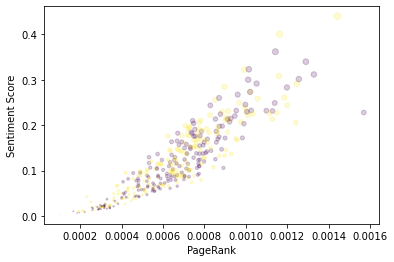

In [648]:
import matplotlib.pyplot as plt
plt.scatter(lr_train_Vals[:,0], lr_train_Vals[:,1], alpha=0.2,
            s=100* lr_train_Vals[:,1], c=lr_train_target, cmap='viridis')
plt.xlabel("PageRank")
plt.ylabel("Sentiment Score");

In [649]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
print(accuracy_score(np.ravel(lr_test_target), preds))
print(f1_score(np.ravel(lr_test_target), preds))
print(confusion_matrix(np.ravel(lr_test_target), preds))

0.5268817204301075
0.6507936507936508
[[ 8 32]
 [12 41]]


In [414]:
le.inverse_transform([1])

array(['BULL'], dtype=object)

In [263]:
# final_test_res.loc[final_test_res["modified_score"] > 0.0, ["pred"]] = "BULL"

In [324]:
groupby_data = final_test_res.groupby("date").agg({"computed_score":"mean"})

In [325]:
groupby_data = groupby_data.assign(pred="")

In [326]:
groupby_data.loc[groupby_data["computed_score"] > 0.05, ["pred"]] = "BULL"

In [328]:
groupby_data.loc[groupby_data["computed_score"] <= -0.05, ["pred"]] = "BEAR"

In [329]:
groupby_data

,computed_score,pred
date,,
2019-01-01,0.100397,BULL
2019-01-02,0.094987,BULL
2019-01-03,0.099860,BULL
2019-01-04,0.069381,BULL
2019-01-05,0.052793,BULL
...,...,...
2019-03-30,0.050585,BULL
2019-03-31,0.000000,
2019-04-01,0.099770,BULL


In [309]:
test_res

,text,date,username,upvotes,parent,nltk_vader_compound,year,vol,comp
0,Pumping the price is done by buying lots of so...,2019-01-10,redpillbluepill4,2.0,t1_ebbwjag,0.2960,2019,BEAR,False
1,"I don't really blame them, the gov is shut dow...",2019-01-10,taranasus,1.0,t1_edpk56o,0.3078,2019,BEAR,False
2,When you read *Hitchhiker's Guide to the Galax...,2019-01-10,WalksOnLego,1.0,t1_edme4rl,0.5267,2019,BEAR,False
3,Don't think it was all of a sudden. For the la...,2019-01-10,Spinerds,2.0,t1_edp0h77,0.1280,2019,BEAR,False
4,If you can hack SHA256 we have other things to...,2019-01-10,Spykwak,1.0,t1_edmcda3,-0.4404,2019,BEAR,True
...,...,...,...,...,...,...,...,...,...
4340,I would know because I bought the stock market...,2019-03-31,bitcoinfloridagator,1.0,t1_ejscwzg,0.0000,2019,BULL,False
4341,Oh no I totally believe you - random person on...,2019-04-01,aidanlister,1.0,t1_ejso69f,-0.2960,2019,BULL,False
4342,Tfw you want this bear market smashed but you ...,2019-03-30,NonGNonM,1.0,t3_b6u2vk,0.2617,2019,BULL,True
4343,> Bitcoin transmits more value than either Mas...,2019-03-30,aidanlister,1.0,t1_ejpgv55,0.9277,2019,BULL,True


In [310]:
price_move

,date,vol
0,2013-04-29,BULL
1,2013-04-30,BEAR
2,2013-05-01,BEAR
3,2013-05-02,BEAR
4,2013-05-03,BEAR
...,...,...
2857,2021-02-23,BEAR
2858,2021-02-24,BULL
2859,2021-02-25,BEAR
2860,2021-02-26,BEAR


In [330]:
test_w_pres = groupby_data.merge(price_move, left_on="date", right_on="date")

In [331]:
test_w_pres

,date,computed_score,pred,vol
0,2019-01-01,0.100397,BULL,BULL
1,2019-01-02,0.094987,BULL,BULL
2,2019-01-03,0.099860,BULL,BEAR
3,2019-01-04,0.069381,BULL,BULL
4,2019-01-05,0.052793,BULL,BEAR
...,...,...,...,...
88,2019-03-30,0.050585,BULL,BULL
89,2019-03-31,0.000000,,BULL
90,2019-04-01,0.099770,BULL,BULL
91,2019-04-03,0.000000,,BULL


In [334]:
tes_res_avgvader = test_res.groupby("date").agg({"nltk_vader_compound":"mean"})

In [354]:
new_test_pred = test_w_pres.merge(tes_res_avgvader, on="date")

In [355]:
new_test_pred

,date,computed_score,pred,vol,nltk_vader_compound
0,2019-01-01,0.100397,BULL,BULL,0.186160
1,2019-01-02,0.094987,BULL,BULL,0.249841
2,2019-01-03,0.099860,BULL,BEAR,0.223479
3,2019-01-04,0.069381,BULL,BULL,0.258421
4,2019-01-05,0.052793,BULL,BEAR,0.104121
...,...,...,...,...,...
88,2019-03-30,0.050585,BULL,BULL,0.594700
89,2019-03-31,0.000000,,BULL,0.000000
90,2019-04-01,0.099770,BULL,BULL,-0.296000
91,2019-04-03,0.000000,,BULL,0.910250


In [356]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
new_test_pred["computed_score"] = new_test_pred["computed_score"] / np.max(new_test_pred["computed_score"])

In [357]:
new_test_pred

,date,computed_score,pred,vol,nltk_vader_compound
0,2019-01-01,0.281582,BULL,BULL,0.186160
1,2019-01-02,0.266410,BULL,BULL,0.249841
2,2019-01-03,0.280076,BULL,BEAR,0.223479
3,2019-01-04,0.194592,BULL,BULL,0.258421
4,2019-01-05,0.148067,BULL,BEAR,0.104121
...,...,...,...,...,...
88,2019-03-30,0.141875,BULL,BULL,0.594700
89,2019-03-31,0.000000,,BULL,0.000000
90,2019-04-01,0.279825,BULL,BULL,-0.296000
91,2019-04-03,0.000000,,BULL,0.910250


In [358]:
new_test_pred["new score"] = new_test_pred["nltk_vader_compound"] * (1.0 + new_test_pred["computed_score"])

In [360]:
(1.0 + new_test_pred["computed_score"])

0     1.281582
1     1.266410
2     1.280076
3     1.194592
4     1.148067
        ...   
88    1.141875
89    1.000000
90    1.279825
91    1.000000
92    1.000184
Name: computed_score, Length: 93, dtype: float64

In [362]:
0.223479 * 1.280076

0.286070104404

In [359]:
new_test_pred

,date,computed_score,pred,vol,nltk_vader_compound,new score
0,2019-01-01,0.281582,BULL,BULL,0.186160,0.238580
1,2019-01-02,0.266410,BULL,BULL,0.249841,0.316401
2,2019-01-03,0.280076,BULL,BEAR,0.223479,0.286069
3,2019-01-04,0.194592,BULL,BULL,0.258421,0.308707
4,2019-01-05,0.148067,BULL,BEAR,0.104121,0.119538
...,...,...,...,...,...,...
88,2019-03-30,0.141875,BULL,BULL,0.594700,0.679073
89,2019-03-31,0.000000,,BULL,0.000000,0.000000
90,2019-04-01,0.279825,BULL,BULL,-0.296000,-0.378828
91,2019-04-03,0.000000,,BULL,0.910250,0.910250


In [363]:
new_test_pred.loc[new_test_pred["new score"] > 0.05, ["pred"]] = "BULL"

In [364]:
new_test_pred.loc[new_test_pred["new score"] <= -0.05, ["pred"]] = "BEAR"

In [366]:
new_test_pred = new_test_pred.assign(match=0)

In [369]:
new_test_pred.loc[(new_test_pred["pred"] == new_test_pred["vol"]), ["match"]] = 1
new_test_pred

,date,computed_score,pred,vol,nltk_vader_compound,new score,match
0,2019-01-01,0.281582,BULL,BULL,0.186160,0.238580,1
1,2019-01-02,0.266410,BULL,BULL,0.249841,0.316401,1
2,2019-01-03,0.280076,BULL,BEAR,0.223479,0.286069,0
3,2019-01-04,0.194592,BULL,BULL,0.258421,0.308707,1
4,2019-01-05,0.148067,BULL,BEAR,0.104121,0.119538,0
...,...,...,...,...,...,...,...
88,2019-03-30,0.141875,BULL,BULL,0.594700,0.679073,1
89,2019-03-31,0.000000,,BULL,0.000000,0.000000,0
90,2019-04-01,0.279825,BEAR,BULL,-0.296000,-0.378828,0
91,2019-04-03,0.000000,BULL,BULL,0.910250,0.910250,1


In [370]:
np.sum(new_test_pred["match"]) / len(new_test_pred)

0.5053763440860215

In [339]:
np.max(test_w_pres[test_w_pres["vol"] == "BULL"]["computed_score"])

0.3565462971877799

In [340]:
np.max(test_w_pres[test_w_pres["vol"] == "BEAR"]["computed_score"])

0.31265158596643255

In [313]:
test_w_pres = test_w_pres.assign(match=0)

In [314]:
test_w_pres

,date,modified_score,pred,vol,match
0,2019-01-01,0.187888,BULL,BULL,0
1,2019-01-02,0.273811,BULL,BULL,0
2,2019-01-03,0.265412,BULL,BEAR,0
3,2019-01-04,0.294595,BULL,BULL,0
4,2019-01-05,0.105859,BULL,BEAR,0
...,...,...,...,...,...
88,2019-03-30,0.641162,BULL,BULL,0
89,2019-03-31,0.000000,,BULL,0
90,2019-04-01,-0.325532,BEAR,BULL,0
91,2019-04-03,0.910250,BULL,BULL,0


In [315]:
test_w_pres.loc[(test_w_pres["pred"] == test_w_pres["vol"]), ["match"]] = 1

In [316]:
test_w_pres

,date,modified_score,pred,vol,match
0,2019-01-01,0.187888,BULL,BULL,1
1,2019-01-02,0.273811,BULL,BULL,1
2,2019-01-03,0.265412,BULL,BEAR,0
3,2019-01-04,0.294595,BULL,BULL,1
4,2019-01-05,0.105859,BULL,BEAR,0
...,...,...,...,...,...
88,2019-03-30,0.641162,BULL,BULL,1
89,2019-03-31,0.000000,,BULL,0
90,2019-04-01,-0.325532,BEAR,BULL,0
91,2019-04-03,0.910250,BULL,BULL,1


In [317]:
np.sum(test_w_pres["match"]) / len(test_w_pres)

0.46236559139784944